In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge,Lasso
sns.set()

In [59]:
data=pd.read_csv("/content/movie_data.txt",sep=",")

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Collection           400 non-null    int64  
 1   Marketin_expense     400 non-null    float64
 2   Production_expense   400 non-null    float64
 3   Multiplex_coverage   400 non-null    float64
 4   Budget               400 non-null    float64
 5   Movie_length         400 non-null    float64
 6   Lead_ Actor_Rating   400 non-null    float64
 7   Lead_Actress_rating  400 non-null    float64
 8   Director_rating      400 non-null    float64
 9   Producer_rating      400 non-null    float64
 10  Critic_rating        400 non-null    float64
 11  Trailer_views        400 non-null    int64  
 12  Time_taken           392 non-null    float64
 13  Twitter_hastags      400 non-null    float64
 14  Genre                400 non-null    object 
 15  Avg_age_actors       400 non-null    int

In [61]:
data.isnull().sum()

Collection             0
Marketin_expense       0
Production_expense     0
Multiplex_coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
Time_taken             8
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
MPAA_film_rating       0
Num_multiplex          0
3D_available           0
dtype: int64

In [62]:
for column in data:
  print(data[column].unique().sum(),  "        "    ,column)

9865400          Collection
21986.572          Marketin_expense
4848.04          Production_expense
33.8031          Multiplex_coverage
12960881.559999999          Budget
41332.2          Movie_length
2354.195          Lead_ Actor_Rating
2508.915          Lead_Actress_rating
2275.315          Director_rating
2486.6800000000003          Producer_rating
575.96          Critic_rating
184800207          Trailer_views
nan          Time_taken
88428.992          Twitter_hastags
ThrillerDramaComedyAction          Genre
1643          Avg_age_actors
PG          MPAA_film_rating
130942          Num_multiplex
YESNO          3D_available


In [63]:
data.shape

(400, 19)

In [64]:
data["Time_taken"].median()

159.72

In [65]:
data["Time_taken"]=data["Time_taken"].fillna(data["Time_taken"].median())

In [66]:
data["3D_available"].unique()

array(['YES', 'NO'], dtype=object)

In [67]:
data['3D_available'] = np.where(data['3D_available']=='YES',1,0)

In [68]:
data['Genre'].unique()

array(['Thriller', 'Drama', 'Comedy', 'Action'], dtype=object)

In [69]:
label_enc=preprocessing.LabelEncoder()

In [70]:
data["Genre"]=label_enc.fit_transform(data["Genre"])

In [71]:
data.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,MPAA_film_rating,Num_multiplex,3D_available
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,3,23,PG,494,1
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,2,42,PG,462,0
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,1,38,PG,458,0
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,2,45,PG,472,1
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,2,55,PG,395,0


In [72]:
data.drop(["MPAA_film_rating"],axis=1,inplace=True)

In [73]:
data.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,3D_available
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,3,23,494,1
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,2,42,462,0
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,1,38,458,0
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,2,45,472,1
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,2,55,395,0


In [74]:
data.shape

(400, 18)

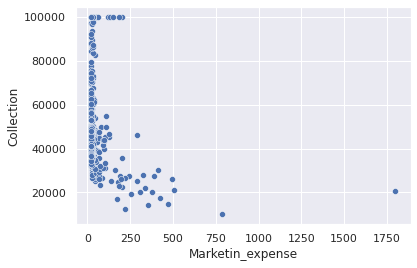

In [75]:
sns.scatterplot(x="Marketin_expense",y='Collection',data=data)

In [76]:
data.drop(data[data['Marketin_expense']>750].index,inplace=True)

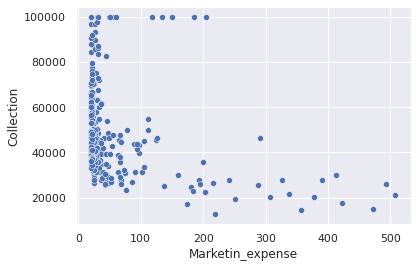

In [77]:
sns.scatterplot(x='Marketin_expense',y='Collection',data=data)

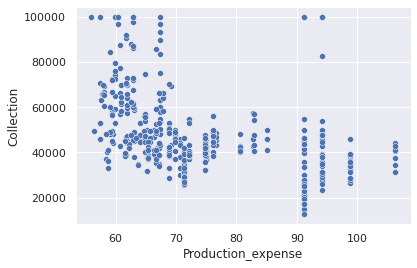

In [78]:
sns.scatterplot(x='Production_expense',y='Collection',data=data)

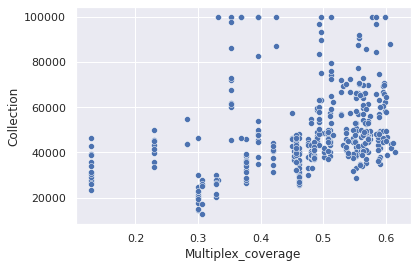

In [79]:
sns.scatterplot(x='Multiplex_coverage',y='Collection',data=data)

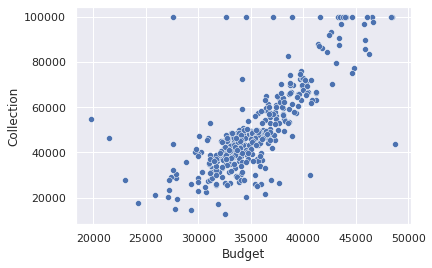

In [80]:
sns.scatterplot(x='Budget',y='Collection',data=data)

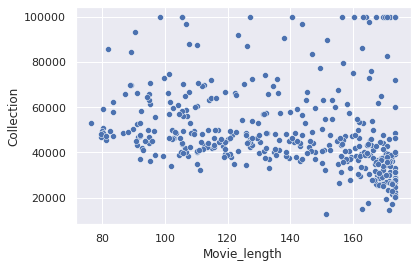

In [81]:
sns.scatterplot(x='Movie_length',y='Collection',data=data)

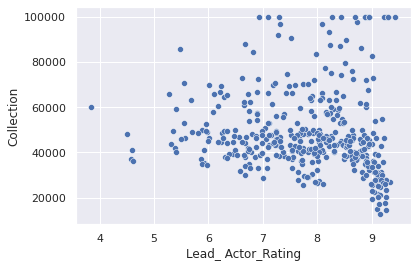

In [82]:
sns.scatterplot(x='Lead_ Actor_Rating',y='Collection',data=data)

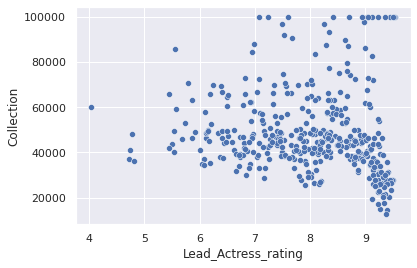

In [83]:
sns.scatterplot(x='Lead_Actress_rating',y='Collection',data=data)

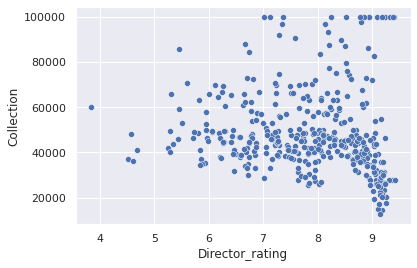

In [84]:
sns.scatterplot(x='Director_rating',y='Collection',data=data)

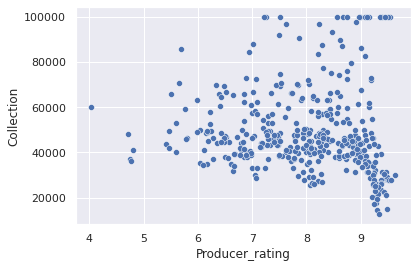

In [85]:
sns.scatterplot(x='Producer_rating',y='Collection',data=data)

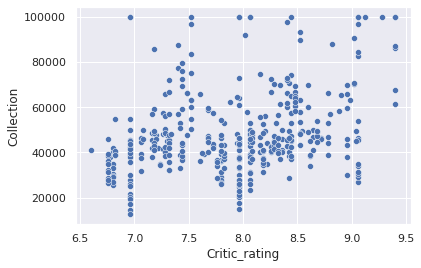

In [86]:
sns.scatterplot(x='Critic_rating',y='Collection',data=data)

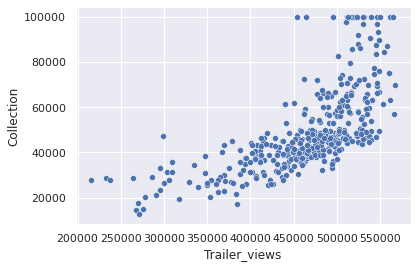

In [87]:
sns.scatterplot(x='Trailer_views',y='Collection',data=data)

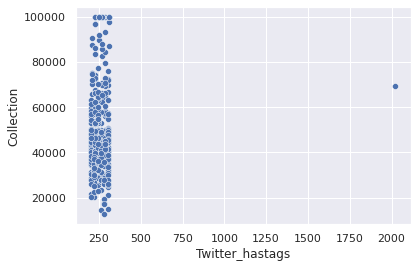

In [88]:
sns.scatterplot(x='Twitter_hastags',y='Collection',data=data)

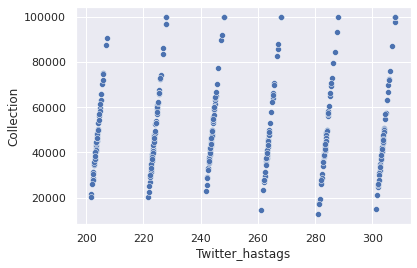

In [89]:
data.drop(data[data["Twitter_hastags"]>2000].index,inplace=True)
sns.scatterplot(x='Twitter_hastags',y='Collection',data=data)

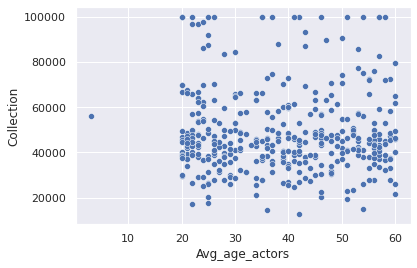

In [90]:
sns.scatterplot(x='Avg_age_actors',y='Collection',data=data)

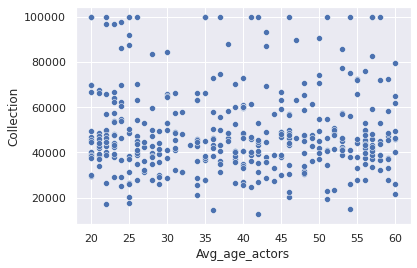

In [91]:
data.drop(data[data["Avg_age_actors"]<10].index,inplace=True)
sns.scatterplot(x='Avg_age_actors',y='Collection',data=data)

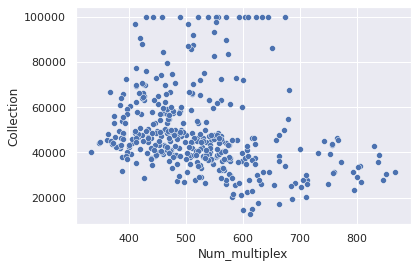

In [92]:
sns.scatterplot(x='Num_multiplex',y='Collection',data=data)

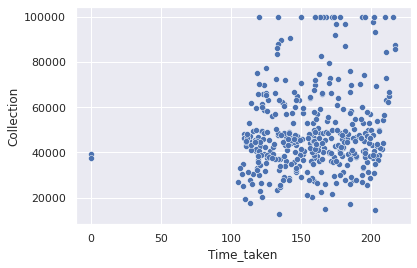

In [93]:
sns.scatterplot(x='Time_taken',y='Collection',data=data)

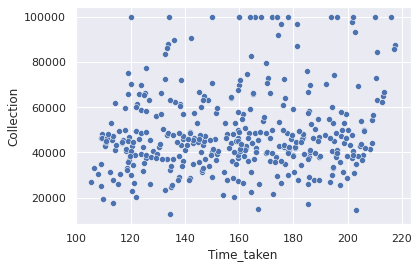

In [94]:
data.drop(data[data["Time_taken"]<50].index,inplace=True)
sns.scatterplot(x='Time_taken',y='Collection',data=data)

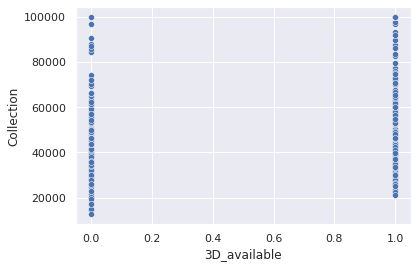

In [95]:
sns.scatterplot(x='3D_available',y='Collection',data=data)

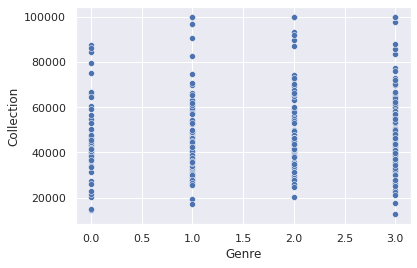

In [96]:
sns.scatterplot(x='Genre',y='Collection',data=data)

In [97]:
x = data.drop('Collection',axis=1)
y=data["Collection"]

In [98]:
regressor=linear_model.LinearRegression()
regressor

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [99]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(275, 17) (119, 17) (275,) (119,)


In [100]:
regressor.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
regressor.intercept_

-171990.2221005481

In [102]:
regressor.coef_

array([ 1.63313445e+01, -2.38478572e+01,  3.90373434e+04,  2.16660370e+00,
       -2.96358411e+01, -2.93027536e+02, -5.08329904e+03,  7.18751597e+03,
        2.59144080e+03,  3.98740987e+03,  9.73933323e-02,  4.63637753e+01,
        1.23692174e+01,  3.97722002e+02,  3.33346786e+01,  1.40607676e+01,
        1.98500930e+03])

In [103]:
regressor_=linear_model.LinearRegression()
regressor_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
regressor_.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [105]:
y_Predict_test=regressor_.predict(x_test)
y_Predict_train=regressor_.predict(x_train)

In [106]:
r2_score(y_test,y_Predict_test)

0.6638045347508079

In [107]:
r2_score(y_train,y_Predict_train)

0.6882687110913659

In [108]:
scaler = preprocessing.StandardScaler().fit(x_train)

In [109]:
x_train_scaler = scaler.transform(x_train)
x_test_scaler=scaler.transform(x_test)

In [ ]:
def find_r2score(method):
    r2_scores_list = []
    alpha=np.arange(-1,10,0.1)
    for i in alpha:
        if method == 'Ridge':
            regressor_ridge = Ridge(alpha=i)
            regressor_ridge.fit(x_train_scaler,y_train)
            r2_scores_list.append(r2_score(y_test,regressor_ridge.predict(x_test_scaler)))
        elif method == 'Lasso':
            regressor_lasso = Lasso(alpha=i)
            regressor_lasso.fit(x_train_scaler,y_train)
            r2_scores_list.append(r2_score(y_test,regressor_lasso.predict(x_test_scaler)))
    print(f"r2_score for {method} =",max(r2_scores_list))
find_r2score(method='Ridge')
find_r2score(method='Lasso')

In [112]:
from sklearn.model_selection import validation_curve

In [115]:
param_range = np.logspace(-8,8,100)
train_scores,test_scores = validation_curve(Ridge(),x_train,y_train,'alpha',param_range,scoring='r2')

In [116]:
train_mean = np.mean(train_scores,axis=1)
max(train_mean)

0.6944436708531738

In [117]:
test_mean = np.mean(test_scores,axis=1)
max(test_mean)

0.620840166427808

In [118]:
train_scores,test_scores = validation_curve(Lasso(),x_train,y_train,'alpha',param_range,scoring='r2')

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12655201051.719086, tolerance: 7627918.745454544
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12655201051.367516, tolerance: 7627918.745454544
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12655201050.857424, tolerance: 7627918.745454544
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126552010

In [119]:
train_mean = np.mean(train_scores,axis=1)
max(train_mean)

0.6944381541284547

In [120]:
test_mean = np.mean(test_scores,axis=1)
max(test_mean)

0.6210018886995761